In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('datasets/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Check for null values and data types
print(df.info())

# Statistical summary (mean, min, max)
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


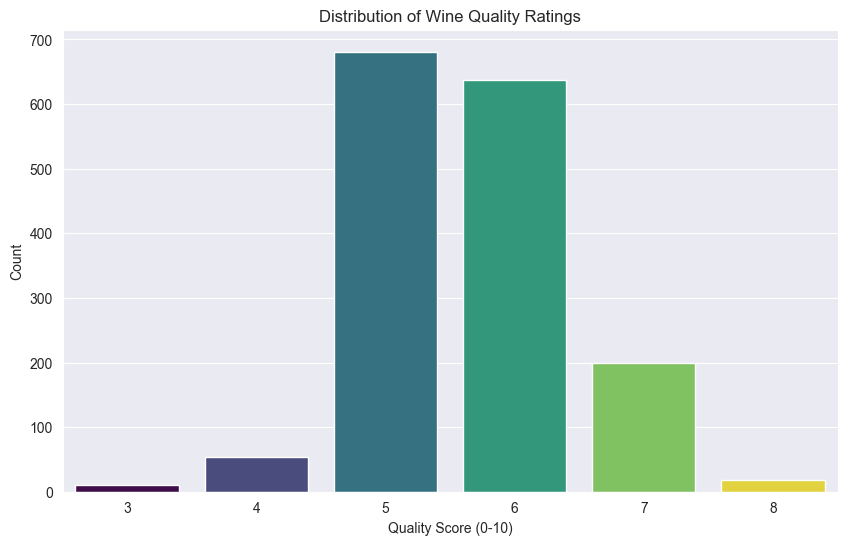

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, hue='quality', palette='viridis', legend=False)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score (0-10)')
plt.ylabel('Count')
plt.show()

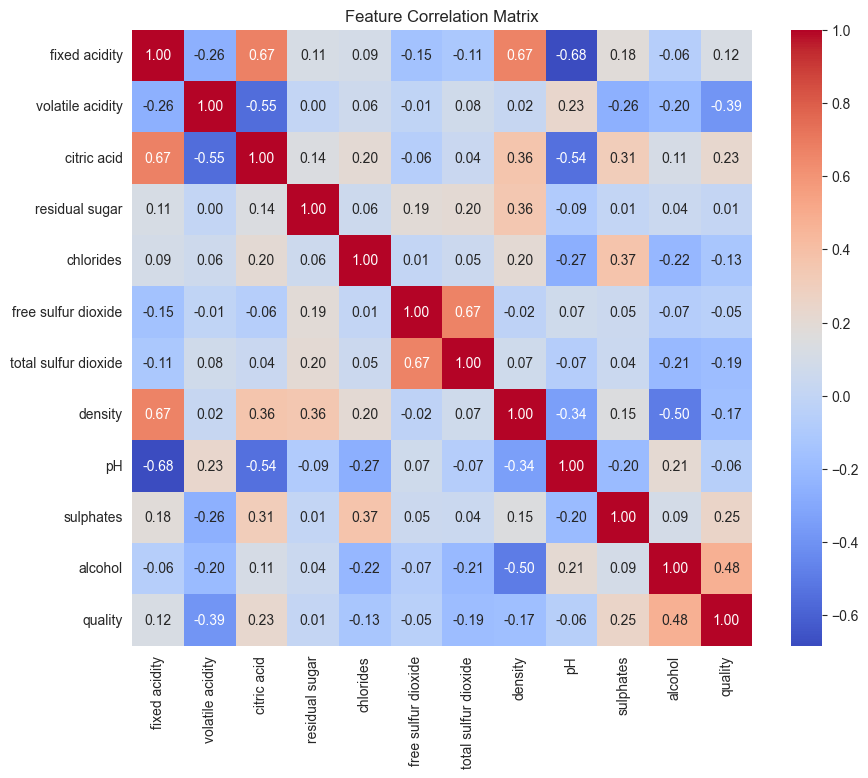

In [4]:
plt.figure(figsize=(10, 8))
# Calculate correlation matrix
corr = df.corr()
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [5]:
# specific correlation with 'quality'
quality_corr = df.corr()['quality'].drop('quality')

# Sort by absolute value to see strength regardless of positive/negative
print(quality_corr.abs().sort_values(ascending=False))

alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


#### Αρχικές παρατηρήσεις.
        - Η βαμολογία της ποιότητας των κρασιών παρουσιάζει κανονική κατανομή.
        - Τα features που παρουσιάζουν την ισχυρότερη συσχέτιση με το target (quality) είναι:
                - Alcohol (0.48)
                - Volatile Acidity (0.39)



#### Θα ελέγξουμε για null values. Σε περίπτωση που βρεθούν θα τις χειριστούμε αναλόγως.

In [6]:
# check for nulls
null_counts = df.isnull().sum()
print("Missing values per column:\n", null_counts[null_counts > 0])

Missing values per column:
 Series([], dtype: int64)


#### Δεν υπάρχουν null values.
    Επειδή το dataset είναι μικρό (1599 γραμμές), σε περίπτωση που υπήρχαν nulls, θα προτιμούσαμε να προχωρήσουμε συμπληρώνοντας το
    μέσο όρο (mean imputation). Διαφορετικά, αν απλά διαγράφαμε κάποιες γραμμές (drop rows) υπήρχε ο κίνδυνος να χάσουμε χρήσιμη πληροφορία.

#### Στη συνέχεια θα κάνουμε κατανομή κλάσεων και θα ψάξουμε για τυχόν ανισορροπία δεδομένων.
    Αυτό γίνεται για να αποφύγουμε το "Accuracy Paradox", όπου αν το 95% των κρασιών είναι "μη ποιοτικά" και το υπόλοιπο 5% ποιοτικά,
    το μοντέλο μπορεί να πετύχει πολύ υψηλό accuracy (95%) απλά προβλέποντας "μη ποιοτικό" για όλα ανεξαιρέτως τα κρασιά!

#### Σε αυτό το σημείο παίρνουμε την απόφαση ότι θα ελέγξουμε για "ποιοτικό" ή "μη ποιοτικό" κρασί και για αυτό το λόγο θα θέσουμε κάποιο όριο.
    Θέτουμε  στο 7, το όριο απο το οποίο και πάνω κάθε κρασί θα θεωρείται ποιοτικό. Θα δημιουργήσουμε ένα νέο  feature που θα παίρνει boolean τιμές, για να
    καταγράψουμε αυτό το δεδομένο.

Class Counts:
 good_quality
0    1382
1     217
Name: count, dtype: int64

Percentage of 'Good' wines: 13.57%


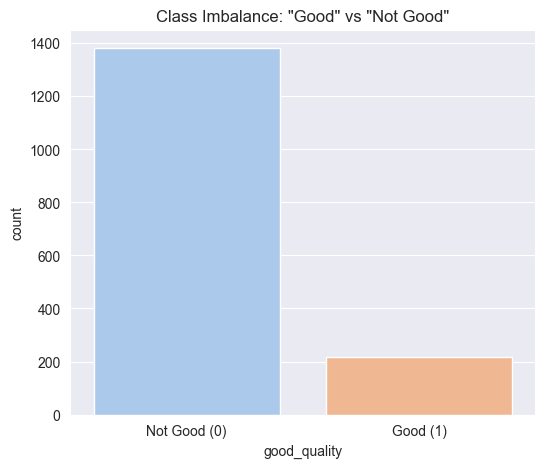

In [7]:
# 1. Create a binary target: 1 if Quality >= 7 (Good), else 0 (Not Good)
df['good_quality'] = [1 if x >= 7 else 0 for x in df['quality']]

# 2. Check the distribution
counts = df['good_quality'].value_counts()
print("Class Counts:\n", counts)

# Calculate percentage
percentage_good = (counts[1] / len(df)) * 100
print(f"\nPercentage of 'Good' wines: {percentage_good:.2f}%")

# 3. Visualize the imbalance
plt.figure(figsize=(6, 5))
sns.countplot(x='good_quality', data=df, hue='good_quality', palette='pastel', legend=False)
plt.xticks([0, 1], ['Not Good (0)', 'Good (1)'])
plt.title('Class Imbalance: "Good" vs "Not Good"')
plt.show()

#### Παρατηρούμε σημαντική ανισορροπία στα δεδομένα μας. Μόνο το 13.6 % ανήκει στα ποιοτικά κρασιά (σύμφωνα με τον κανόνα που οι ίδιοι θέσαμε).
    Για αυτό το λόγο θα ακολουθήσουμε μια Cost Sensitive προσέγγιση μηχανικής μάθησης ώστε να μην χάσουμε πολλά "ποιοτικά"  κρασιά, έστω και ας έχουμε ελαφρώς αυξημένα "μη ποιοτικά" χαρακτηρισμένα ως "ποιοτικά".


#### Αρχικά θα χωρίσουμε το dataset σε train και test και θα κάνουμε scale τις τιμές γιατί ο SVM είναι distance based algorithm.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define Features (X) and Target (y)
# We drop 'quality' (original score) and 'good_quality' (target)
X = df.drop(['quality', 'good_quality'], axis=1)
y = df['good_quality']

# 2. Split the data (80% Training, 20% Testing)
# random_state=42 ensures we get the same split every time we run this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the data (Mandatory for SVMs)
scaler = StandardScaler()

# Fit on training set ONLY, then transform both
# This prevents "data leakage" (the model shouldn't know the stats of the test set)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data split and scaled successfully.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples:  {X_test.shape[0]}")

Data split and scaled successfully.
Training samples: 1279
Testing samples:  320


####  Θα εκπαιδευσουμε 5 μοντέλα: linear svm, weighted svm with radial basis factor, weighted decision trees with different depths

In [9]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# --- 1. Weighted RBF SVM (Curved boundary) ---
# class_weight='balanced' automatically calculates weights inversely proportional to class frequencies
svm_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_rbf.fit(X_train, y_train)
preds_rbf = svm_rbf.predict(X_test)

print("--- Weighted SVM Results ---")
print(classification_report(y_test, preds_rbf))

# --- 2. Linear SVM ---
# class_weight='balanced' automatically calculates weights inversely proportional to class frequencies
svm_linear = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_linear.fit(X_train, y_train)
preds_linear = svm_linear.predict(X_test)

print("--- Linear SVM Results ---")
print(classification_report(y_test, preds_linear))

# --- 3. Weighted Decision Tree ---
tree_weighted = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
tree_weighted.fit(X_train, y_train)
y_pred_tree = tree_weighted.predict(X_test)

print("\n--- Weighted Decision Tree Results ---")
print(classification_report(y_test, y_pred_tree))

# --- 4. Weighted Decision Tree (Deeper) ---
deep_tree_weighted = DecisionTreeClassifier(max_depth=25, class_weight='balanced', random_state=42)
deep_tree_weighted.fit(X_train, y_train)
y_pred_deep_tree = deep_tree_weighted.predict(X_test)

print("\n--- Weighted Decision Deep Tree Results ---")
print(classification_report(y_test, y_pred_deep_tree))

# --- 5. Weighted Decision Tree (Depth = 50) ---
deeper_tree_weighted = DecisionTreeClassifier(max_depth=50, class_weight='balanced', random_state=42)
deeper_tree_weighted.fit(X_train, y_train)
y_pred_deeper_tree = deeper_tree_weighted.predict(X_test)

print("\n--- Weighted Decision Tree (Depth = 50) Results ---")
print(classification_report(y_test, y_pred_deeper_tree))

--- Weighted SVM Results ---
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       273
           1       0.48      0.94      0.63        47

    accuracy                           0.84       320
   macro avg       0.73      0.88      0.77       320
weighted avg       0.91      0.84      0.86       320

--- Linear SVM Results ---
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       273
           1       0.42      0.89      0.57        47

    accuracy                           0.80       320
   macro avg       0.70      0.84      0.72       320
weighted avg       0.90      0.80      0.83       320


--- Weighted Decision Tree Results ---
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       273
           1       0.39      0.87      0.54        47

    accuracy                           0.78       320
   macro avg       0.68      0.8

#### Απο τις μετρήσεις παρατηρούμε πως το μοντέλο με τη καλύτερη απόδοση συνολικά είναι το weighted rbf.
    Παρατηρούμε πως τα binary trees έχουν αισθητά χαμηλότερο σκόρ για το dataset μας.
    Αυτό οφείλεται στην κατανομή των σημείων του dataset, καθώς τα συγκεκρίμενα μοντέλα είναι καταλληλότερα για άλλες μορφές δεδομένων.
#### Θα ρίξουμε μια ματιά στο ROC curve και στο confusion matrix για κάθε μοντέλο.

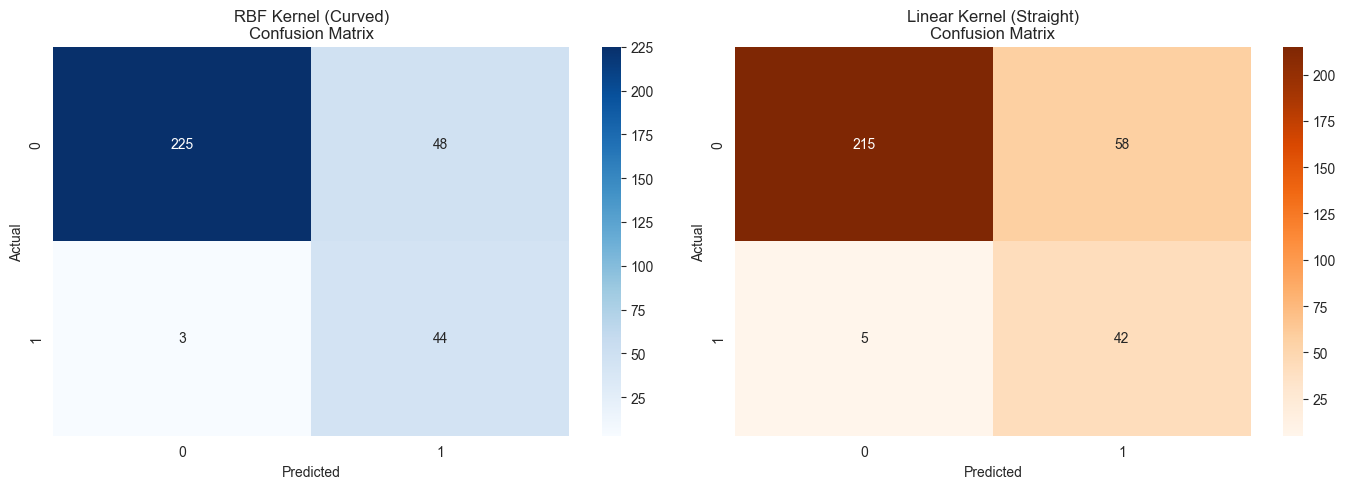

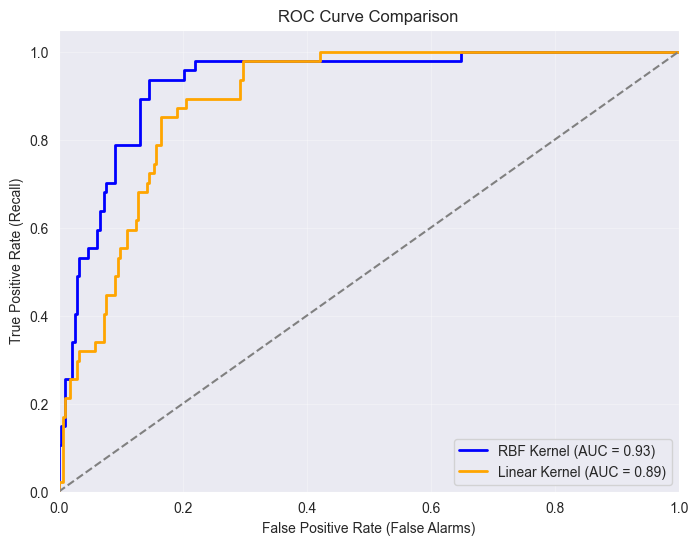

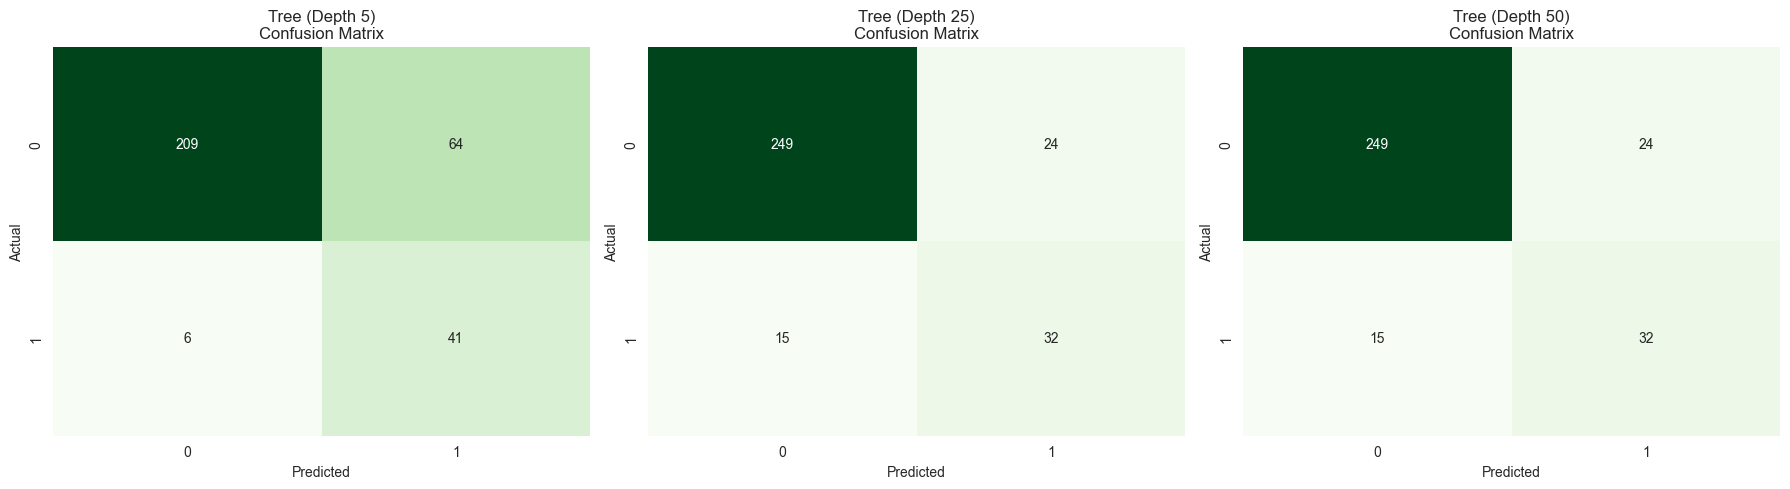

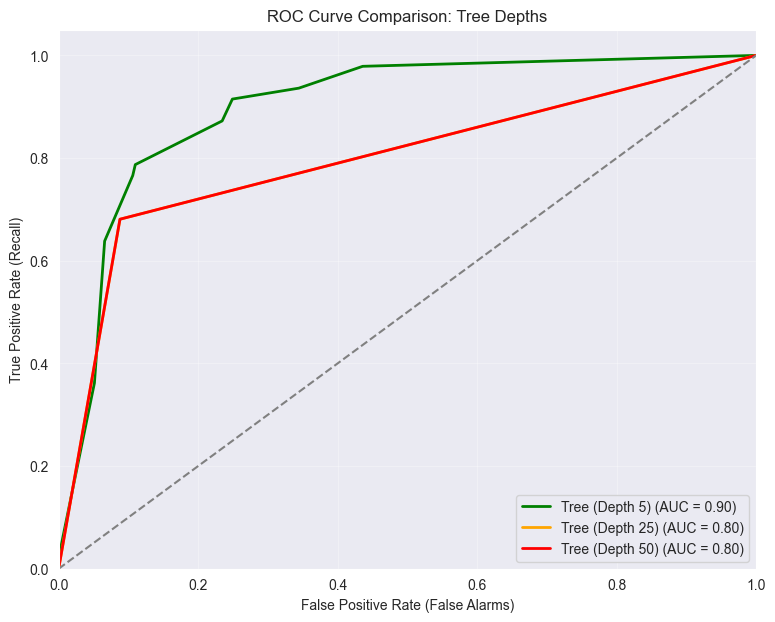

In [10]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ---  Confusion Matrices (Side-by-Side) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Predict
preds_rbf = svm_rbf.predict(X_test)
preds_linear = svm_linear.predict(X_test)

# Plot RBF Matrix
sns.heatmap(confusion_matrix(y_test, preds_rbf), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('RBF Kernel (Curved)\nConfusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot Linear Matrix
sns.heatmap(confusion_matrix(y_test, preds_linear), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Linear Kernel (Straight)\nConfusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# --- 3. ROC Curves (Overlaid) ---
plt.figure(figsize=(8, 6))

models = [('RBF Kernel', svm_rbf), ('Linear Kernel', svm_linear)]
colors = ['blue', 'orange']

for (name, model), color in zip(models, colors):
    # Get the decision function scores (distance from hyperplane)
    y_score = model.decision_function(X_test)

    # Calculate FPR and TPR
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line (random guess)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# ---------------------------------- Binary Trees -------------------------
from sklearn.tree import DecisionTreeClassifier

# --- 1. Train the Models ---

# Model A: Depth = 5 (Restricted, simpler logic)
tree_5 = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
tree_5.fit(X_train, y_train)

# Model B: Depth = 25 (Deep, complex logic)
tree_25 = DecisionTreeClassifier(max_depth=25, class_weight='balanced', random_state=42)
tree_25.fit(X_train, y_train)

# Model C: Depth = 50 (Very Deep, potentially memorizing noise)
tree_50 = DecisionTreeClassifier(max_depth=50, class_weight='balanced', random_state=42)
tree_50.fit(X_train, y_train)

# List of models for looping
models = [
    ('Tree (Depth 5)', tree_5),
    ('Tree (Depth 25)', tree_25),
    ('Tree (Depth 50)', tree_50)
]

# --- 2. Confusion Matrices (3 Side-by-Side) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, model) in enumerate(models):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)

    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[idx], cbar=False)
    axes[idx].set_title(f'{name}\nConfusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# --- 3. ROC Curves (Overlaid) ---
plt.figure(figsize=(9, 7))

colors = ['green', 'orange', 'red']

for (name, model), color in zip(models, colors):
    # Get probability scores for the positive class (Good Wine)
    # Trees use predict_proba instead of decision_function
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate FPR and TPR
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison: Tree Depths')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


#### Παρατηρούμε ότι το rbf μοντέλο εντόπισε περισσότερα πραγματικά "ποιοτικά" και λιγότερα ψευδώς "ποιοτικά" κρασιά.
    Αύτο γίνεται γιατί μπορεί να προσαρμόζεται καλύτερα στα δεδομένα μας (μπορεί και καμπυλώνει γύρω τους), εφόσον δεν έχει τον περιορισμό που έχει το γραμμικό μοντέλο.
    Διαπιστώνουμε πως οι χημικές αλληλεπιδράσεις των συστατικών του κρασιού είναι μή γραμμικές, εφόσον το μη γραμμικό μοντέλο μας τις περιγράφει καλύτερα.
 #### Όπως είδαμε και προηγουμένως τα μοντέλα δυαδικών δένδρων αποδίδουν χειρότερα απο τα svm μοντέλα.
     Τα δέντρα με μεγαλύτερο βάθος απο 25 φαίνεται να αποδίδουν ακριβώς το ίδιο μεταξύ τους. Ελαφρώς καλύτερα αποδίδει το μοντέλο με depth = 5, το οποίο βρίσκει
     περισσότερα πραγματικά "ποιοτικά" αλλά δυστυχώς και πολύ περισσότερα ψευδώς "ποιοτικά" κρασιά. Άρα έχουμε να κάνουμε με περίπτωση overfitting καθώς το μοντέλο
     καθώς βαθαίνει απομνημονεύει τα training data αλλά αποτυγχάνει να γενικεύσει όταν συναντήσει νέα δεδομένα (τα test data).

#### Βελτιστοποίηση υπερπαραμέτρων
    Θα χρησιμποιήσουμε Grid Search για την εύρεση των βέλτιστων παραμέτρων των μοντέλων.
    Θα το τρέξουμε μια φορά για τα svm μοντέλα και μια για τα δυαδικά δένδρα.
    Θα δούμε πως καθυστερεί λίγο να ολοκληρωθεί η διαδικασία. Αυτό συμβαίνει γιατί ο αλγόριθμος δημιουργεί έναν πίνακα κατάταξης (grid), τρέχει όλους τους πιθανούς συνδυασμούς των παραμέτρων και επιλέγει τον συνδυασμό που δίνει τις βέλτιστες τιμές.
#### Σημαντική παρατήρηση.
    Χρησιμοποιούμε scoring = 'f1' στην παραμετροποίηση του αλγορίθμου. Αυτό τον αναγκάζει να διαλέξει το μοντέλο που ισορροπεί τις μετρικές precision και recall
    για τα "ποιοτικά" κρασιά, αντί να μεγιστοποιήσει το accuracy (αποφυγή accuracy paradox).

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# --- 1. Configure the SVM Grid ---
svm_params = {
    'C': [0.1, 1, 10, 100],              # Regularization (Strictness)
    'gamma': [1, 0.1, 0.01, 'scale'],    # Kernel coefficient (Curvature)
    'kernel': ['rbf', 'linear'],         # We Test both kernels
    'class_weight': ['balanced']         # Mandatory for our imbalance
}

# --- 2. Configure the Decision Tree Grid ---
tree_params = {
    'max_depth': [5, 10, 25, 50, None],  # We Test different depths
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'criterion': ['gini', 'entropy'],    # Splitting quality measure
    'class_weight': ['balanced']
}

# --- 3. Run SVM Search ---
svm_grid = GridSearchCV(
    SVC(random_state=42),
    svm_params,
    cv=3,                # 3-fold Cross Validation
    scoring='f1',        # Optimize for F1 Score (Balance of Precision/Recall)
    verbose=1,
    n_jobs=-1            # Use all CPU cores
)
svm_grid.fit(X_train, y_train)

print(f"Best SVM Params: {svm_grid.best_params_}")
print(f"Best SVM F1 Score: {svm_grid.best_score_:.4f}")

# --- 4. Run Tree Search ---
tree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    tree_params,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)
tree_grid.fit(X_train, y_train)

print(f"Best Tree Params: {tree_grid.best_params_}")
print(f"Best Tree F1 Score: {tree_grid.best_score_:.4f}")

# --- 5. Final Evaluation on Test Set ---
print("\n" + "="*40)
print("FINAL SHOWDOWN: TEST SET RESULTS")
print("="*40)

print("\n--- Optimized SVM ---")
best_svm = svm_grid.best_estimator_
y_pred_svm_opt = best_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm_opt))

print("\n--- Optimized Decision Tree ---")
best_tree = tree_grid.best_estimator_
y_pred_tree_opt = best_tree.predict(X_test)
print(classification_report(y_test, y_pred_tree_opt))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best SVM Params: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM F1 Score: 0.5422
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Tree Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 2}
Best Tree F1 Score: 0.5442

FINAL SHOWDOWN: TEST SET RESULTS

--- Optimized SVM ---
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       273
           1       0.51      0.83      0.63        47

    accuracy                           0.86       320
   macro avg       0.74      0.85      0.77       320
weighted avg       0.90      0.86      0.87       320


--- Optimized Decision Tree ---
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       273
           1       0.57      0.68      0.62        47

    accuracy                           0.88  

#### Παρατηρήσεις
        - SVM: Επιλέχθηκε rbf kernel όπως ήταν το αναμενόμενο απο τις προηγούμενες προσπάθειες μας.
                Καλύτερες παράμετροι: 'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'
                F1 score = 0.63

        - Binary Trees: Επιλέχθηκε μοντέλο με depth = 25, κάτι που δεν το περιμέναμε. Πιθανότατα η παράμετρος "min_samples_split" μας επέτρεψε να επιλέξουμε
                μοντέλα με μεγαλύτερο βάθος ενώ ταυτόχρονα απέφυγε τη δημιουργία μικροσκοπικών leaf nodes.
                Καλύτερες παράμετροι: 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 2
                F1 score = 0.62

#### Permutation importance
     Στα πλαίσια απάντησης στην ερώτηση 'Τι κατατάσσει ένα κρασι στα "ποιοτικά";' θα δημιουργήσουμε γραφήματα σημασίας μεταθέσεων (Permutation importance graphs).
     Η μεθοδολογία περιλαμβάνει τη μετάθεση των τιμών ενός feature, διαταράσσοντας έτσι τη σχέση του με το target. Συγκρίνοντας την απόδοση του μοντέλου
     πρίν και μετά τη μετάθεση παίρνουμε μια "τιμή σημασίας" (importance value). Αυτή η τιμή αντανακλά την μείωση στην απόδοση του μοντέλου, που αποδίδεται
     στην μετάθεση της τιμής.


Calculating SVM Feature Importance (this takes a moment)...


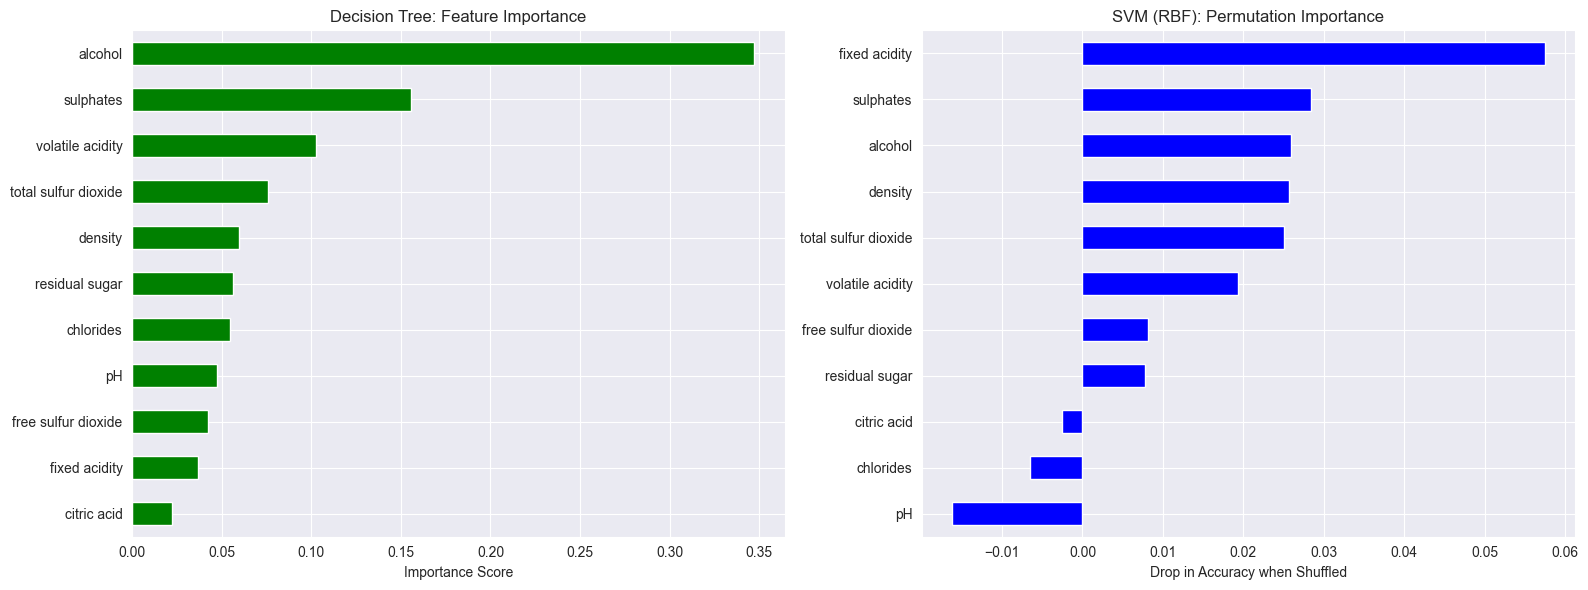

In [15]:
from sklearn.inspection import permutation_importance

# --- 1. Decision Tree Feature Importance ---
# Trees have this built-in
tree_importances = pd.Series(best_tree.feature_importances_, index=X.columns)

# --- 2. SVM Permutation Importance ---
# We shuffle one column at a time (e.g., scramble "Alcohol") and check how much accuracy drops.
# If accuracy crashes, "Alcohol" was very important.
print("Calculating SVM Feature Importance (this takes a moment)...")
perm_importance = permutation_importance(best_svm, X_test, y_test, n_repeats=10, random_state=42)
svm_importances = pd.Series(perm_importance.importances_mean, index=X.columns)

# --- 3. Plotting Side-by-Side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Tree Importance
tree_importances.sort_values().plot(kind='barh', color='green', ax=axes[0])
axes[0].set_title("Decision Tree: Feature Importance")
axes[0].set_xlabel("Importance Score")

# Plot SVM Importance
svm_importances.sort_values().plot(kind='barh', color='blue', ax=axes[1])
axes[1].set_title("SVM (RBF): Permutation Importance")
axes[1].set_xlabel("Drop in Accuracy when Shuffled")

plt.tight_layout()
plt.show()

#### Παρατηρήσεις. Εδώ επιβεβαιώνεται η επιλογή μας να εκπαιδεύσουμε δύο διαφορετικά είδη μοντέλων.
     Στο γράφημα του δυαδικού δένδρού επιβεβαιώνονται τα ευρήματα του αρχικού μας heatmap.
     Στο γράφημα του svm βλέπουμε μια συσχέτιση ανάμεσα στο "fixed_acidity" και στα υπόλοιπα συστατικά του κρασιού. Αυτό μας δίνει μια
     νέα οπτική για το τι κατατάσσει ένα κρασί στα "ποιοτικά".